# ASSIGNMENT : IRIS MULTI-CLASS CLASSIFICATION

###### Purpose :
To predict the species of flower .
###### Description :
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
###### Requirements :
1) Code must be in tf 2.0 .

2) Accuracy must be in between 95-97% .

3) Model shouldn't be Overfit (You can add drop out layer for this) .

### STEP 1 : Load all the necessary libraries 

https://www.kaggle.com/ash316/ml-from-scratch-with-iris <br>
http://tekshinobi.com/analyzing-iris-dataset-with-keras-and-tensorflow-machine-learning-and-data-analysis/ <br>
https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/ <br>

In [1]:
# Any results you write to the current directory are saved as output.
import itertools

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
from tensorflow import keras

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical

In [6]:
import matplotlib.pyplot as plt

### STEP 2 : Data Preparation
This step consists of multiple sub steps from data loading [download](https://github.com/ramsha275/PIAIC-Sir-Anees-Quarter-2/blob/master/Deep%20Learning/iris.csv),shuffling ,spliting in **Train** and **Test** sets to one-hot-enconding on labels . 


<h3>Create Dataframes for features and target</h3>

In [7]:
layers = keras.layers
models = keras.models

In [8]:
encoder = LabelBinarizer()
seed = 42

In [9]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
iris_data_df = iris_df.loc[:, iris_df.columns != 'variety']
iris_data_df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
variety = ['Setosa', 'Versicolor', 'Virginica']
iris_target_array = iris_df['variety'].apply(variety.index)
iris_target = np.array(iris_target_array)
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [12]:
#target = encoder.fit_transform(iris_target)
target = to_categorical(iris_target)
target

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [13]:
# iris_target_df = pd.DataFrame({
#     'Setosa' : iris_df['variety'] == 'Setosa',
#     'Versicolor' : iris_df['variety'] == 'Versicolor',
#     'Virginica' : iris_df['variety'] == 'Virginica',
# })*1
# iris_target_df.head()
iris_target_df = pd.DataFrame(data=target, columns=variety) 
iris_target_df.head()

,Setosa,Versicolor,Virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


<h3>Create training and testing datasets</h3>

In [14]:
X_train,X_test,y_train,y_test = train_test_split(iris_data_df,
                                                 iris_target_df,
                                                 test_size=0.20,
                                                 random_state=seed)

In [15]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

120
30
120
30


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


<h3>Feature scaling.</h3>

ML algos perform best when all dataset features have the same scale. Particularly, in Neural Nets, we use MinMaxScaler with range between 0 and 1.<br>
Also, since MinMaxScalar transformation makes us lose the column and index labels, we need to recreate the dataframes for scaled data and target.

In [17]:
# scaler = MinMaxScaler(feature_range=(0,1))
# scaler

In [18]:
# X_train = pd.DataFrame(scaler.fit_transform(X_train),
#                                columns=X_train.columns,
#                                index=X_train.index)
# X_train.head()

In [19]:
# X_test = pd.DataFrame(scaler.transform(X_test),
#                            columns=X_test.columns,
#                            index=X_test.index)
# X_test.head()

<h5>Optional micro detail:</h5>
Note that we use <b>fit_transform</b> on X_train and <b>transform</b> on X_test.<br>
It is very important that we don’t fit on test data.

### STEP 3 : Model Architecture 


###### Input : 4 
###### 1 hidden Layer : 8 nodes
###### Output : 3

<h3>Build Model </h3>

<b>tanh:</b><br>
The exponential linear activation:
<code>x</code>
if
<code>x>0</code>
and
<code>alpha * (exp(x)-1) </code>
if
<code>x<0</code>

In [20]:
# model = Sequential()
# ##model.add(Dense(4, input_dim=4, activation='tanh', name='input_layer'))
# model.add(Dense(4, input_shape=(4,), name='input_layer'))
# model.add(Dense(8, activation='tanh', name='hidden_layer'))
# model.add(layers.Activation('relu'))
# model.add(Dense(3, activation='softmax', name='output_layer'))
# model.summary()

In [149]:
model = Sequential()
model.add(Dense(4, input_shape=(4,), name='input_layer'))
model.add(Dense(8, activation='tanh', name='hidden_layer'))
model.add(Activation('tanh'))
model.add(Dense(3, name='output_layer'))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 4)                 20        
_________________________________________________________________
hidden_layer (Dense)         (None, 8)                 40        
_________________________________________________________________
activation_20 (Activation)   (None, 8)                 0         
_________________________________________________________________
output_layer (Dense)         (None, 3)                 27        
_________________________________________________________________
activation_21 (Activation)   (None, 3)                 0         
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


### STEP 4 : Compilation Step 

In [150]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 4)                 20        
_________________________________________________________________
hidden_layer (Dense)         (None, 8)                 40        
_________________________________________________________________
activation_20 (Activation)   (None, 8)                 0         
_________________________________________________________________
output_layer (Dense)         (None, 3)                 27        
_________________________________________________________________
activation_21 (Activation)   (None, 3)                 0         
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [151]:
X_train.head()

,sepal.length,sepal.width,petal.length,petal.width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [152]:
X_test.head()

,sepal.length,sepal.width,petal.length,petal.width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [153]:
# def model():
#     """build the Keras model callback"""
#     model = Sequential()
#     model.add(Dense(4, input_dim=4, activation='tanh', name='input_layer'))
#     model.add(Dense(8, activation='tanh', name='hidden_layer'))
#     model.add(Dense(3, activation='softmax', name='output_layer'))
 
#     model.compile(loss="categorical_crossentropy",
#                   optimizer="adam",
#                   metrics=['accuracy'])
#     return model

<h3>Create estimator</h3>

In [154]:
# estimator = KerasClassifier(
#     build_fn=model,
#     epochs=200, batch_size=20,
#     verbose=2)
# estimator

In [155]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [156]:
# results = cross_val_score(estimator, X_train, y_train, cv=kfold)

In [157]:
# print("Model Performance: mean: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

tanh : Model Performance: mean: 86.67% std: (8.19%)

In [158]:
#model = model()
history = model.fit(
       X_train,
       y_train,
       validation_split=.1,
       epochs=200,
       shuffle=True, # shuffle data randomly.
       #NNs perform best on randomly shuffled data
       verbose=2 # this will tell keras to print more detailed info
       # during trainnig to know what is going on
       )

Train on 108 samples, validate on 12 samples
Epoch 1/200
108/108 - 3s - loss: 1.1804 - acc: 0.3148 - val_loss: 1.1049 - val_acc: 0.4167
Epoch 2/200
108/108 - 0s - loss: 1.1607 - acc: 0.3148 - val_loss: 1.0962 - val_acc: 0.4167
Epoch 3/200
108/108 - 0s - loss: 1.1440 - acc: 0.3148 - val_loss: 1.0869 - val_acc: 0.4167
Epoch 4/200
108/108 - 0s - loss: 1.1234 - acc: 0.3148 - val_loss: 1.0773 - val_acc: 0.4167
Epoch 5/200
108/108 - 0s - loss: 1.1002 - acc: 0.3148 - val_loss: 1.0666 - val_acc: 0.4167
Epoch 6/200
108/108 - 0s - loss: 1.0774 - acc: 0.3148 - val_loss: 1.0566 - val_acc: 0.4167
Epoch 7/200
108/108 - 0s - loss: 1.0518 - acc: 0.3241 - val_loss: 1.0460 - val_acc: 0.4167
Epoch 8/200
108/108 - 0s - loss: 1.0220 - acc: 0.3889 - val_loss: 1.0350 - val_acc: 0.4167
Epoch 9/200
108/108 - 0s - loss: 0.9939 - acc: 0.5185 - val_loss: 1.0235 - val_acc: 0.4167
Epoch 10/200
108/108 - 0s - loss: 0.9637 - acc: 0.6204 - val_loss: 1.0108 - val_acc: 0.5833
Epoch 11/200
108/108 - 0s - loss: 0.9382 - a

Epoch 90/200
108/108 - 0s - loss: 0.4061 - acc: 0.9630 - val_loss: 0.5271 - val_acc: 0.9167
Epoch 91/200
108/108 - 0s - loss: 0.4037 - acc: 0.9630 - val_loss: 0.5246 - val_acc: 0.9167
Epoch 92/200
108/108 - 0s - loss: 0.4019 - acc: 0.9537 - val_loss: 0.5222 - val_acc: 0.9167
Epoch 93/200
108/108 - 0s - loss: 0.3996 - acc: 0.9537 - val_loss: 0.5200 - val_acc: 0.9167
Epoch 94/200
108/108 - 0s - loss: 0.3981 - acc: 0.9630 - val_loss: 0.5180 - val_acc: 0.9167
Epoch 95/200
108/108 - 0s - loss: 0.3954 - acc: 0.9630 - val_loss: 0.5156 - val_acc: 0.9167
Epoch 96/200
108/108 - 0s - loss: 0.3932 - acc: 0.9630 - val_loss: 0.5134 - val_acc: 0.9167
Epoch 97/200
108/108 - 0s - loss: 0.3911 - acc: 0.9630 - val_loss: 0.5112 - val_acc: 0.9167
Epoch 98/200
108/108 - 0s - loss: 0.3888 - acc: 0.9630 - val_loss: 0.5093 - val_acc: 0.9167
Epoch 99/200
108/108 - 0s - loss: 0.3867 - acc: 0.9630 - val_loss: 0.5074 - val_acc: 0.9167
Epoch 100/200
108/108 - 0s - loss: 0.3844 - acc: 0.9630 - val_loss: 0.5055 - val

Epoch 179/200
108/108 - 0s - loss: 0.1954 - acc: 0.9722 - val_loss: 0.2556 - val_acc: 1.0000
Epoch 180/200
108/108 - 0s - loss: 0.1931 - acc: 0.9722 - val_loss: 0.2537 - val_acc: 1.0000
Epoch 181/200
108/108 - 0s - loss: 0.1910 - acc: 0.9722 - val_loss: 0.2513 - val_acc: 1.0000
Epoch 182/200
108/108 - 0s - loss: 0.1888 - acc: 0.9722 - val_loss: 0.2509 - val_acc: 1.0000
Epoch 183/200
108/108 - 0s - loss: 0.1871 - acc: 0.9722 - val_loss: 0.2512 - val_acc: 1.0000
Epoch 184/200
108/108 - 0s - loss: 0.1864 - acc: 0.9630 - val_loss: 0.2508 - val_acc: 1.0000
Epoch 185/200
108/108 - 0s - loss: 0.1854 - acc: 0.9630 - val_loss: 0.2444 - val_acc: 1.0000
Epoch 186/200
108/108 - 0s - loss: 0.1828 - acc: 0.9722 - val_loss: 0.2419 - val_acc: 1.0000
Epoch 187/200
108/108 - 0s - loss: 0.1804 - acc: 0.9722 - val_loss: 0.2366 - val_acc: 1.0000
Epoch 188/200
108/108 - 0s - loss: 0.1788 - acc: 0.9815 - val_loss: 0.2317 - val_acc: 1.0000
Epoch 189/200
108/108 - 0s - loss: 0.1775 - acc: 0.9722 - val_loss: 0.

activation=tanh
epoch200 -> 100%acc
epoch100 -> 100%acc
epoch4 -> 30%acc
epoch50 -> 87%acc
epoch75 ->83%acc
epoch90 ->90%acc
epoch100 ->86.67%acc
epoch100 ->90%acc
epoch200 ->96.6%acc


activation=relu
epoch100 ->93%acc


<h5>Optional micro detail:</h5>
<ol>
    <li>
        Input layer(layer_1) has 4 inputs corresponding to 4 feature columns in X_train. <br> The output_layer has 3 outputs for the three classes in target. </li>
    <li>
        You can try different activation functions in layer_1, layer_2 and layer_3 like sigmoid or relu. <br>Sometimes choice of activation function affects the results a great deal. In most cases, you will be using non-linear activation functions like tanh, sigmoid or relu.</li>
    <li>
        <b>metrics=[‘accuracy’]:</b> Here default accuracy is used which is categorical_accuracy. Some other accuracy settings are binary_accuracy, sparse_categorical_accuracy etc. Default is the most appropriate here. </li>
    </ol>

### STEP 5 : Evaluation 

In [159]:
test_error_rate = model.evaluate(X_test, y_test, verbose=2)
test_error_rate

30/30 - 0s - loss: 0.1750 - acc: 0.9667


[0.17496968805789948, 0.96666664]

In [160]:
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              test_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              test_error_rate[0]*100))
#You can run the code again to see how the model perform

acc : 96.67%
loss : 17.50%


tanh : acc : 97.78% loss : 33.21% <br>
<h5>achieved</h5>

### STEP 6 : Prediction 

In [33]:
predicted_targets = model.predict_classes(X_test)
predicted_targets

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [34]:
#true_targets = encoder.inverse_transform(y_test.values)
#true_targets
true_targets = np.argmax(y_test.values, axis=1)
true_targets

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [35]:
#performance_tracker(predicted_targets, true_targets)
#flowers = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
print("Flowers in test set: Setosa={} Versicolor={} Virginica={}".format(
            y_test.Setosa.sum(), y_test.Versicolor.sum(),
            y_test.Virginica.sum()))

Flowers in test set: Setosa=10.0 Versicolor=9.0 Virginica=11.0


In [36]:
for act,exp in zip(predicted_targets, true_targets):
        #tup = np.where(exp == 1)
        if act != exp: #tup[0][0]
            print("ERROR: {} predicted as {}".format(variety[exp],
                  variety[act]))
        else:
            print("CORRECT: {} predicted as {}".format(variety[exp],
                  variety[act]))

CORRECT: Versicolor predicted as Versicolor
CORRECT: Setosa predicted as Setosa
CORRECT: Virginica predicted as Virginica
CORRECT: Versicolor predicted as Versicolor
CORRECT: Versicolor predicted as Versicolor
CORRECT: Setosa predicted as Setosa
CORRECT: Versicolor predicted as Versicolor
CORRECT: Virginica predicted as Virginica
CORRECT: Versicolor predicted as Versicolor
CORRECT: Versicolor predicted as Versicolor
CORRECT: Virginica predicted as Virginica
CORRECT: Setosa predicted as Setosa
CORRECT: Setosa predicted as Setosa
CORRECT: Setosa predicted as Setosa
CORRECT: Setosa predicted as Setosa
CORRECT: Versicolor predicted as Versicolor
CORRECT: Virginica predicted as Virginica
CORRECT: Versicolor predicted as Versicolor
CORRECT: Versicolor predicted as Versicolor
CORRECT: Virginica predicted as Virginica
CORRECT: Setosa predicted as Setosa
CORRECT: Virginica predicted as Virginica
CORRECT: Setosa predicted as Setosa
CORRECT: Virginica predicted as Virginica
CORRECT: Virginica pre

In [37]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [38]:
#results

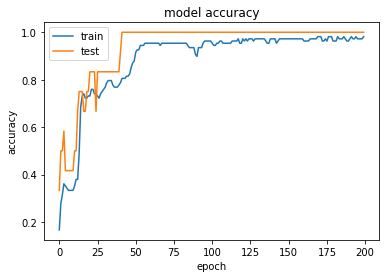

In [39]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

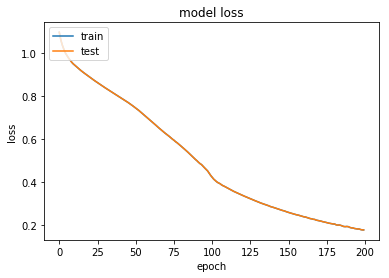

In [40]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
#import seaborn as sns


In [52]:
#from subprocess import check_output

In [53]:
#iris = pd.read_csv("Iris.csv") #load the dataset

In [54]:
#iris.head(2) #show the first 2 rows from the dataset

In [56]:
#iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

In [57]:
#iris.head()

In [58]:
# fig = iris[iris.variety=='Setosa'].plot(kind='scatter',x='sepal.length',y='sepal.width',color='orange', label='Setosa')
# iris[iris.variety=='Versicolor'].plot(kind='scatter',x='sepal.length',y='sepal.width',color='blue', label='Versicolor', ax=fig)
# iris[iris.variety=='Virginica'].plot(kind='scatter',x='sepal.length',y='sepal.width',color='green', label='Virginica', ax=fig)
# fig.set_xlabel("Sepal Length")
# fig.set_ylabel("Sepal Width")
# fig.set_title("Sepal Length VS Width")
# fig=plt.gcf()
# fig.set_size_inches(10,6)
# plt.show()

In [59]:
# fig = iris[iris.variety=='Setosa'].plot.scatter(x='petal.length',y='petal.width',color='orange', label='Setosa')
# iris[iris.variety=='Versicolor'].plot.scatter(x='petal.length',y='petal.width',color='blue', label='Versicolor',ax=fig)
# iris[iris.variety=='Virginica'].plot.scatter(x='petal.length',y='petal.width',color='green', label='Virginica', ax=fig)
# fig.set_xlabel("Petal Length")
# fig.set_ylabel("Petal Width")
# fig.set_title(" Petal Length VS Width")
# fig=plt.gcf()
# fig.set_size_inches(10,6)
# plt.show()

In [60]:
# iris.hist(edgecolor='black', linewidth=1.2)
# fig=plt.gcf()
# fig.set_size_inches(12,6)
# plt.show()

In [61]:
# plt.figure(figsize=(15,10))
# plt.subplot(2,2,1)
# sns.violinplot(x='variety',y='petal.length',data=iris)
# plt.subplot(2,2,2)
# sns.violinplot(x='variety',y='petal.width',data=iris)
# plt.subplot(2,2,3)
# sns.violinplot(x='variety',y='sepal.length',data=iris)
# plt.subplot(2,2,4)
# sns.violinplot(x='variety',y='sepal.width',data=iris)

In [62]:
# importing alll the necessary packages to use the various classification algorithms
# from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
# from sklearn.model_selection import train_test_split #to split the dataset for training and testing
# from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
# from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
# from sklearn import metrics #for checking the model accuracy
# from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [63]:
#iris.shape #get the shape of the dataset

In [64]:
# plt.figure(figsize=(7,4)) 
# sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
# plt.show()

In [65]:
# train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# # the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
# print(train.shape)
# print(test.shape)

In [66]:
# train_X = train[['sepal.length','sepal.width','petal.length','petal.width']]# taking the training data features
# train_y=train.variety# output of our training data
# test_X= test[['sepal.length','sepal.width','petal.length','petal.width']] # taking test data features
# test_y =test.variety  #output value of test data

In [67]:
#train_X.head(2)

In [68]:
#test_X.head(2)

In [69]:
#train_y.head()  ##output of the training data

<h3>Support Vector Machine (SVM)</h3>

In [70]:
# model = svm.SVC() #select the algorithm
# model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
# prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
# print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
# #we pass the predicted output by the model and the actual output

<h3>Logistic Regression</h3>

In [71]:
# model = LogisticRegression()
# model.fit(train_X,train_y)
# prediction=model.predict(test_X)
# print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

<h3>Decision Tree</h3>

In [72]:
# model=DecisionTreeClassifier()
# model.fit(train_X,train_y)
# prediction=model.predict(test_X)
# print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

<h3>K-Nearest Neighbours</h3>

In [73]:
# model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
# model.fit(train_X,train_y)
# prediction=model.predict(test_X)
# print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

<b>Let's check the accuracy for various values of n for K-Nearest nerighbours</b>

In [74]:
# a_index=list(range(1,11))
# a=pd.Series()
# x=[1,2,3,4,5,6,7,8,9,10]
# for i in list(range(1,11)):
#     model=KNeighborsClassifier(n_neighbors=i) 
#     model.fit(train_X,train_y)
#     prediction=model.predict(test_X)
#     a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
# plt.plot(a_index, a)
# plt.xticks(x)

<h3>Creating Petals And Sepals Training Data</h3>

In [75]:
# petal=iris[['petal.length','petal.width','variety']]
# sepal=iris[['sepal.length','sepal.width','variety']]

In [76]:
# train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
# train_x_p=train_p[['petal.width','petal.length']]
# train_y_p=train_p.variety
# test_x_p=test_p[['petal.width','petal.length']]
# test_y_p=test_p.variety


# train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
# train_x_s=train_s[['sepal.width','sepal.length']]
# train_y_s=train_s.variety
# test_x_s=test_s[['sepal.width','sepal.length']]
# test_y_s=test_s.variety

<h3>SVM</h3>

In [77]:
# model=svm.SVC()
# model.fit(train_x_p,train_y_p) 
# prediction=model.predict(test_x_p) 
# print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

# model=svm.SVC()
# model.fit(train_x_s,train_y_s) 
# prediction=model.predict(test_x_s) 
# print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

<h3>Logistic Regression</h3>

In [78]:
# model = LogisticRegression()
# model.fit(train_x_p,train_y_p) 
# prediction=model.predict(test_x_p) 
# print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

# model.fit(train_x_s,train_y_s) 
# prediction=model.predict(test_x_s) 
# print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

<h3>Decision Tree</h3>

In [79]:
# model=DecisionTreeClassifier()
# model.fit(train_x_p,train_y_p) 
# prediction=model.predict(test_x_p) 
# print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

# model.fit(train_x_s,train_y_s) 
# prediction=model.predict(test_x_s) 
# print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

<h3>K-Nearest Neighbours</h3>

In [80]:
# model=KNeighborsClassifier(n_neighbors=3) 
# model.fit(train_x_p,train_y_p) 
# prediction=model.predict(test_x_p) 
# print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

# model.fit(train_x_s,train_y_s) 
# prediction=model.predict(test_x_s) 
# print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))